## Bayesian Perspective on Regularization: Understanding Ridge and Lasso

#### This notebook will attempt to derive the Ridge and Lasso regularization methods through bayesian regressin

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace
import seaborn as sns

##### Understanding Ridge Regression through Bayesian Lens

In Bayesian statistics, regularization emerges naturally through the concept of priors. Ridge regression (L2) corresponds to assuming a Gaussian prior on the weights:

$p(w) = \mathcal{N}(0, \tau^2)$

where $\tau^2$ is related to the regularization parameter $\lambda$ by $\lambda = \frac{1}{2\tau^2}$

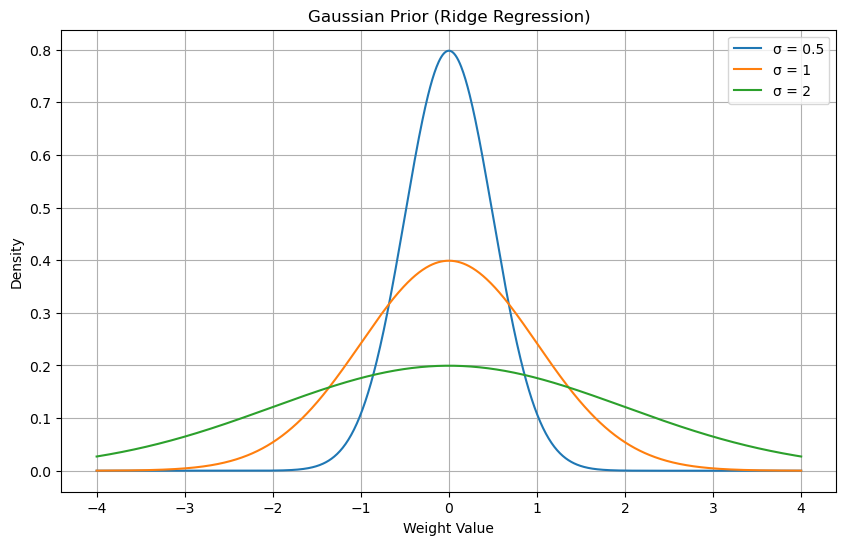

In [7]:
def plot_gaussian_prior():
    x = np.linspace(-4, 4, 1000)
    
    plt.figure(figsize=(10, 6))
    for sigma in [0.5, 1, 2]:
        y = norm.pdf(x, 0, sigma)
        plt.plot(x, y, label=f'σ = {sigma}')
    
    plt.title('Gaussian Prior (Ridge Regression)')
    plt.xlabel('Weight Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_gaussian_prior()

Lasso regression (L1) corresponds to assuming a Laplace prior on the weights:

$p(w) = \frac{1}{2b}\exp(-\frac{|w|}{b})$

where $b$ is related to the regularization parameter $\lambda$ by $\lambda = \frac{1}{b}$

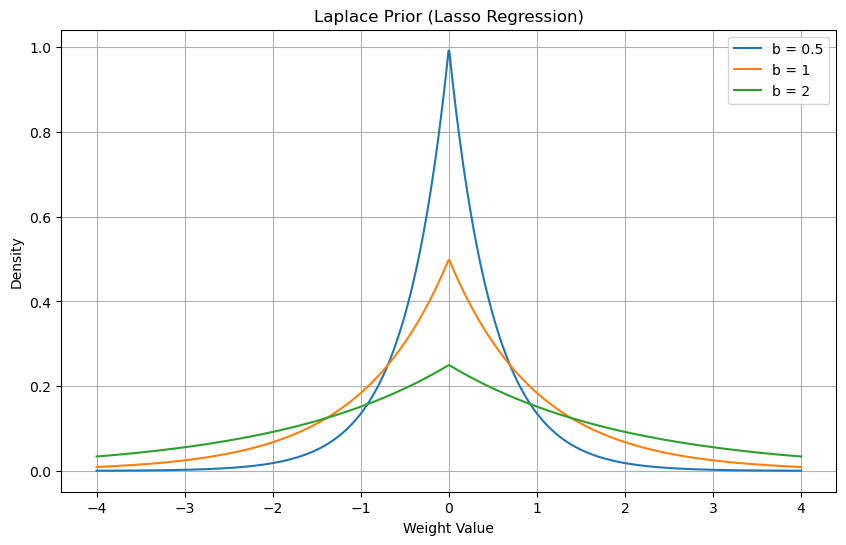

In [12]:
def plot_laplace_prior():
    x = np.linspace(-4, 4, 1000)
    
    plt.figure(figsize=(10, 6))
    for b in [0.5, 1, 2]:
        y = laplace.pdf(x, 0, b)
        plt.plot(x, y, label=f'b = {b}')
    
    plt.title('Laplace Prior (Lasso Regression)')
    plt.xlabel('Weight Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_laplace_prior()

##### Demonstrating Effect on Parameter Estimates

Let's simulate data and see how different priors affect parameter estimates:

$y = Xw + \epsilon$

where $\epsilon \sim \mathcal{N}(0, \sigma^2)$

In [15]:
# Generate synthetic data
np.random.seed(42)
n_samples = 100
n_features = 20

# True parameters (sparse)
w_true = np.zeros(n_features)
w_true[0:5] = [1.5, -2, 1, -1, 0.5]

# Generate design matrix
X = np.random.randn(n_samples, n_features)
# Generate noisy observations
y = X @ w_true + np.random.normal(0, 0.1, n_samples)

In [17]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit models with different regularization strengths
alphas = [0.1, 1.0, 10.0]
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge.fit(X_scaled, y)
    lasso.fit(X_scaled, y)
    
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)


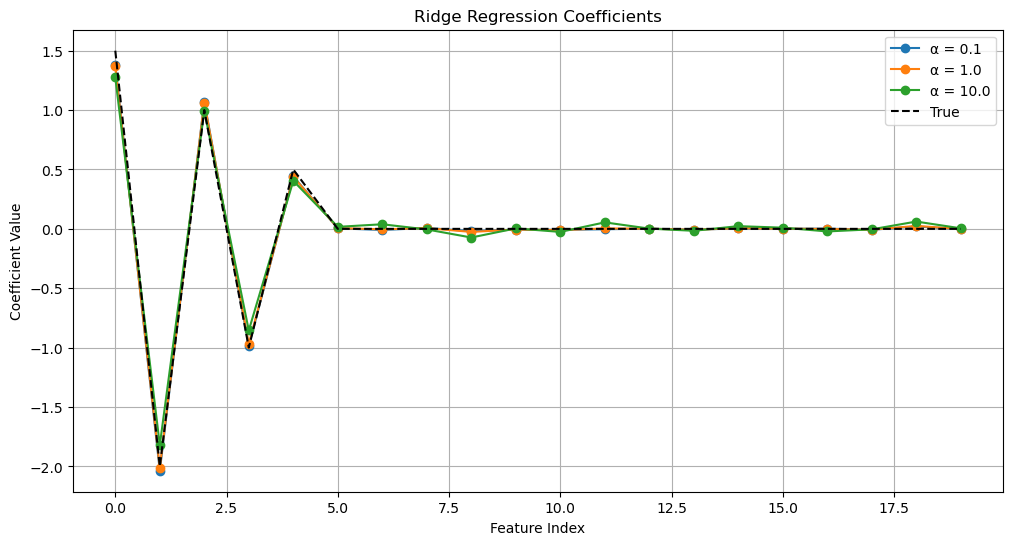

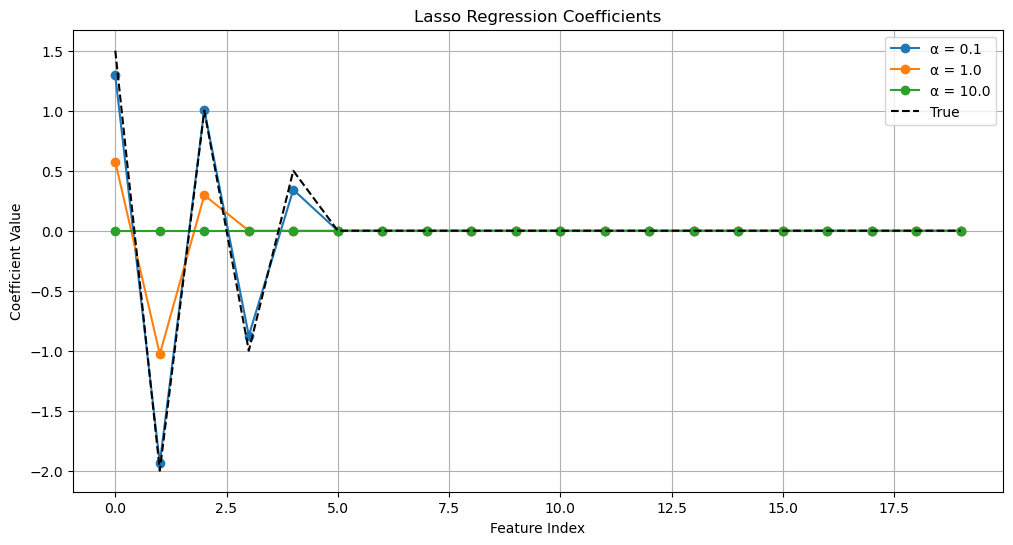

In [19]:
# Plot coefficients
def plot_coefficients(coefs, title):
    plt.figure(figsize=(12, 6))
    for alpha, coef in zip(alphas, coefs):
        plt.plot(range(n_features), coef, 'o-', label=f'α = {alpha}')
    plt.plot(range(n_features), w_true, 'k--', label='True')
    
    plt.title(title)
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_coefficients(ridge_coefs, 'Ridge Regression Coefficients')
plot_coefficients(lasso_coefs, 'Lasso Regression Coefficients')

#### Key Insights:

1. Ridge Regression (Gaussian Prior):
   - Shrinks all coefficients proportionally
   - Never sets coefficients exactly to zero
   - Mathematically: $\min_w ||y - Xw||^2 + \lambda ||w||^2$

2. Lasso Regression (Laplace Prior):
   - Promotes sparsity
   - Can set coefficients exactly to zero
   - Mathematically: $\min_w ||y - Xw||^2 + \lambda ||w||_1$

The Bayesian perspective provides a principled way to understand why these regularization approaches work:
- Ridge: Assumes weights are normally distributed around zero
- Lasso: Assumes weights follow a sparse distribution with more mass at zero

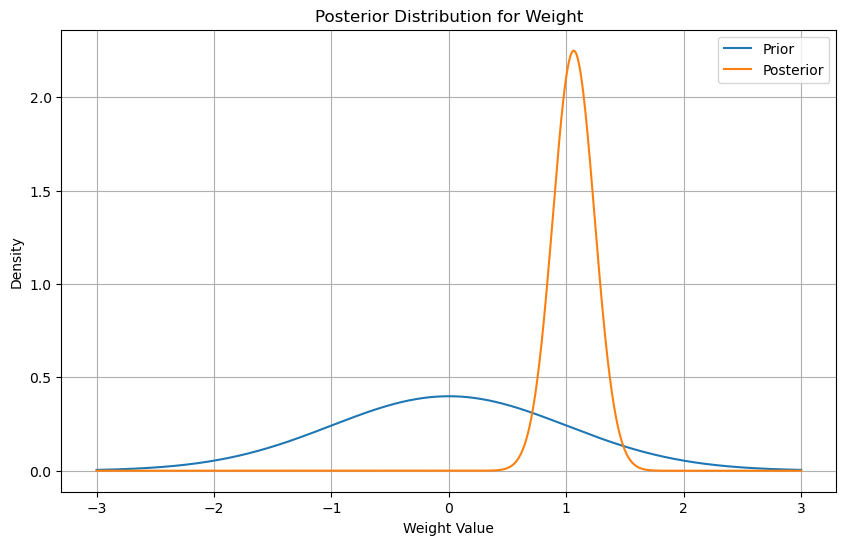

In [22]:
# Posterior Distribution Visualization
def plot_posterior(likelihood_var, prior_var, x_obs, y_obs):
    """Visualize posterior distribution for a single weight"""
    w = np.linspace(-3, 3, 1000)
    
    # Prior
    prior = norm.pdf(w, 0, np.sqrt(prior_var))
    
    # Likelihood
    likelihood = norm.pdf(y_obs, x_obs * w[:, np.newaxis], np.sqrt(likelihood_var))
    likelihood = np.prod(likelihood, axis=1)
    
    # Posterior (unnormalized)
    posterior = prior * likelihood
    posterior = posterior / np.trapz(posterior, w)
    
    plt.figure(figsize=(10, 6))
    plt.plot(w, prior, label='Prior')
    plt.plot(w, posterior, label='Posterior')
    plt.title('Posterior Distribution for Weight')
    plt.xlabel('Weight Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate simple example data
x_obs = np.array([1.0, 1.2, 0.8])
y_obs = np.array([1.1, 1.3, 0.9])

plot_posterior(0.1, 1.0, x_obs, y_obs)